# gbsv Mini-Challenge 2

2023-11-27


_Barbisch Florin_


In dieser Mini-Challenge werden LE3 und LE4 von gbsv geprüft. In Data Science und Machine Learning werden oft Merkmale (Features) von Bildern und Signalen generiert, um basierend darauf zu analysieren oder zu lernen. Diesem Thema widmen wir uns mittels klassischer Signal- und Bildverarbeitung.

Jede:r Studierende:r hat eine individualisierte Aufgabenstellung. Die Abgabe soll ebenfalls einzigartig sein. 

Die Programmiersprache und die Code-Dokumentation darf frei gewählt werden. Sofern nicht anders erwähnt, dürfen vorhandene Bibliotheken verwendet werden. Gebe die Quellen deiner Daten und ggf. deines Codes an. 


**Checkpoints:** 

- Aufgabenstellung Rebuttal: In dieser Phase kann die Aufgabenstellung gereviewt und überarbeitet werden. Sofern die Studierenden entsprechende Argumente haben. Bis ca. 1 Woche nach MC-Start am Tag der Sprechstunde. 5. Dez. 2023

- Review ausgewählte Daten: Reviewe deine ausgewählten Daten bis 3 Wochen nach MC-Start mit der Fachexpertin. Das Review kann schriftlich oder in der Sprechstunde erfolgen. 12. Dez. 2023

- Anonymisierte Abgabe im Peer-Grading-Tool: Code, Resultate und Report gemäss Vorlage. Es können aktuell max. 100MB aufs Peer-Grading Tool geladen werden. 12. Jan. 2024 

- Peer-Grading von anderen Abgaben. In letzten Sprechstunde im Semester oder bis 19. Jan 2024. 

**Die Termine sind jeweils um 23:59.**

## 1. Mustersuche in Bild und Signal (LE3)
### 1.1. Korrelation in Signalen
Suche 1 Signal, welches wiederkehrende Muster enthält. Analyisere dann mittels Auto-Korrelation die wiederkehrenden Muster innerhalb deines Signals. Kann die Periodizität deines Musters via Auto-Korrelogramm sichtbar gemacht werden? Diskutiere deine Methoden- und Parameterwahl sowie die Resultate in ca. 150 Wörtern. 
Schneide nun ein Stück deines Signals aus und versuche es via Kreuzkorrelation im Ursprungssignal zu finden. Woran erkennst du, dass die Stelle passt? Beschreibe in 1-2 Sätzen. Verändere nun dein ausgeschnittenes Stück etwas und schaue, ob es immer noch via Kreuzkorrelation gefunden werden kann. Welche Arten von Veränderungen werden toleriert? Welche nicht? **Diskutiere die Resultate in ca. 150 Wörtern.** 

Achtung: dies ist eine offene Aufgabenstellung. Setzt euch selbst einen Rahmen für die Beschränkung oder kommt in die Sprechstunde, sofern euch die Grenzen nicht klar sind. Treffende Datenwahl, auf den Punkt gebrachte Kreativität, massvolle Vielfalt und kritisches Denken sind gesucht. 

---

Als Signal verwende ich die tägliche durchschnittliche Strahlung der [Messstation Mythenquai](https://www.stadt-zuerich.ch/pd/de/index/stadtpolizei_zuerich/gewaesser/wetterstationen_webcam/wetterdaten_mythenquai.html) zwischne den Jahren 2007 bis 2023. Ich erwarte darin eine Saisonalität, da die Sonne im Sommer stärker scheint als im Winter. Die Strahlung wird in W/m² angegeben.

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import ccf

In [27]:
mythenquai_df = pd.read_csv("signal/messwerte_mythenquai_seit2007-2023.csv")
global_radiation = mythenquai_df["global_radiation"].values[144000:658718] # missing values at the end (Baustelle)
print(f"number of nan: {sum(pd.isna(global_radiation))}")
daily_radiation = global_radiation[:-(global_radiation.shape[0] % 144)]
daily_radiation = daily_radiation.reshape((-1, 144))
daily_radiation = daily_radiation.mean(axis=1)
print(f"Global Radation of {daily_radiation.shape[0]} days")

number of nan: 0
Global Radation of 3574 days


In [92]:
# print min and max values
print(f"min: {min(daily_radiation)} W/m²")
print(f"max: {max(daily_radiation)} W/m²")

min: 4.513888888888889 W/m²
max: 359.59027777777777 W/m²


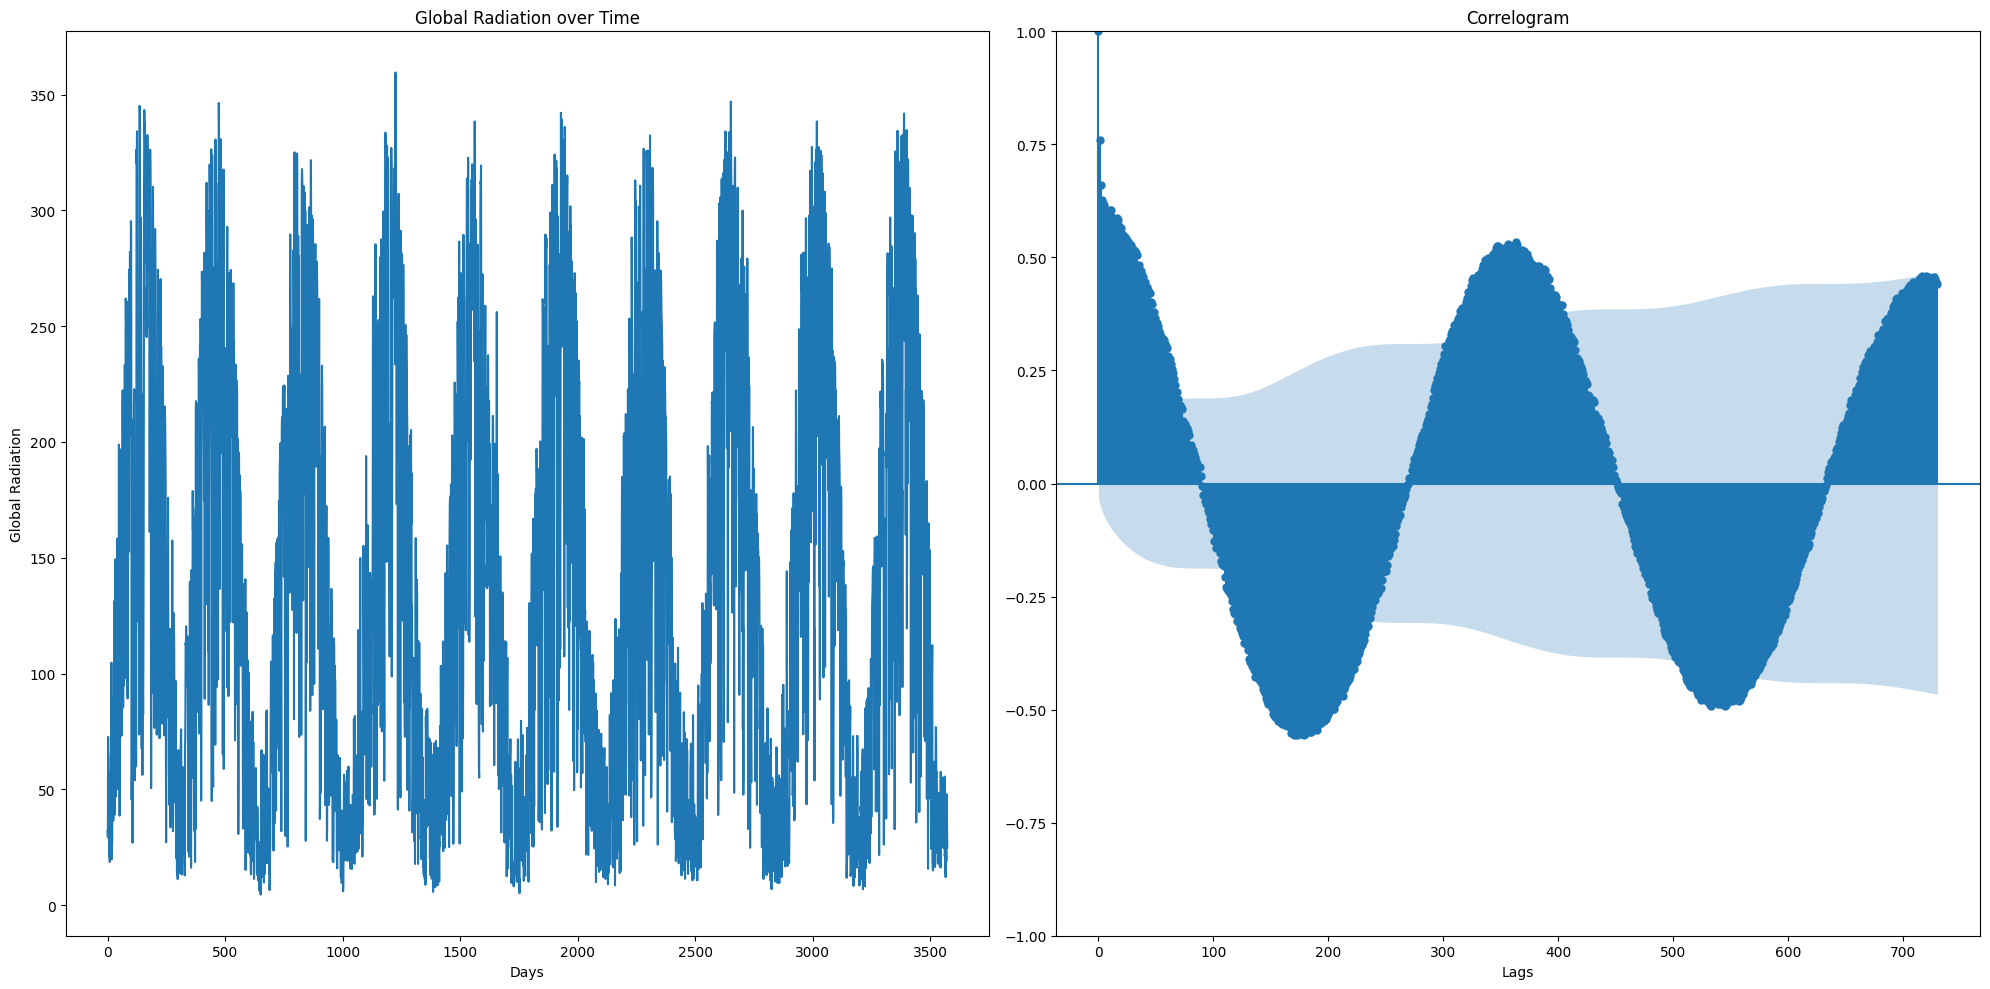

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))

ax[0].plot(daily_radiation)
ax[0].set_title("Global Radiation over Time")
ax[0].set_ylabel("Global Radiation")
ax[0].set_xlabel("Days")

sm.graphics.tsa.plot_acf(daily_radiation, lags=365*2, title="Correlogram", ax=ax[1])
ax[1].set_xlabel("Lags")

plt.tight_layout()
plt.show()

In der obenstehenden Grafik sieht man links die durchschnittliche Strahlung pro Tag. Links davon ist sehr gut die Saisonalität zu erkennen, denn im Sommer ist die Strahlung höher als im Winter. Die Periodzität liegt bei einem Jahr.

Die Periodizität des Signals kann effektiv durch ein Auto-Korrelogramm visualisiert werden, wie in der Grafik oben dargestellt. Das Auto-Korrelogramm zeigt deutlich einen zyklischen Charakter des Signals, was auf eine starke saisonale Komponente hindeutet, die sich im jährlichen Rhythmus wiederholt. Bei der Auswahl der Methoden wurde auf die Auto-Korrelationsfunktion aus der statsmodels-Bibliothek zurückgegriffen, was eine bewährte Wahl für die Analyse zeitlicher Abhängigkeiten in Zeitreihendaten ist. Die Parameterwahl mit einer Verzögerung (Lags) von zwei Jahren ist ideal, um die jährliche Periodizität zu erfassen und zu visualisieren.

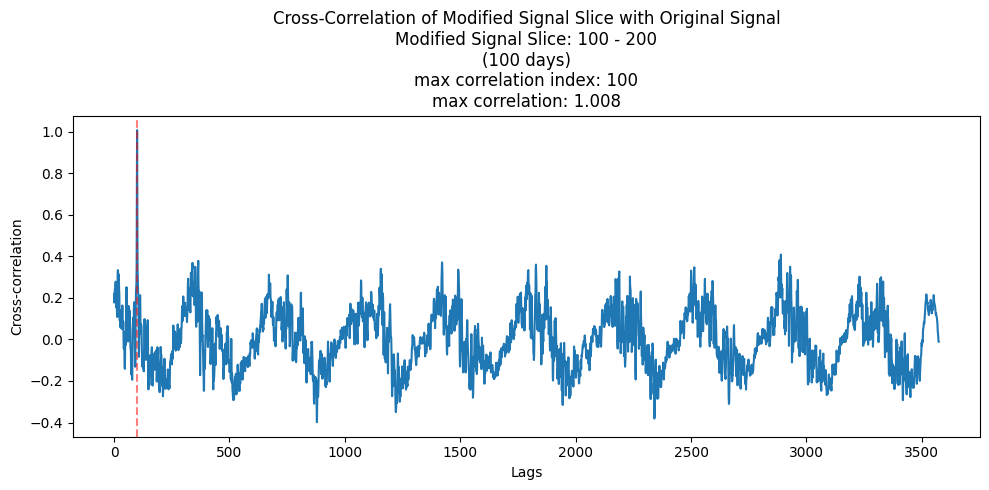

(100, 1.0076487465668131)

In [87]:
def test_signal_modifications(daily_radiation, start_day, end_day, modify_function = lambda x: x):
    original_slice = daily_radiation[start_day:end_day]
    modified_slice = modify_function(original_slice)

    # we want to compute backward lag, so we need to reverse the cross_correlation
    # because the statsmodels ccf function computes only forward lag
    cross_correlation = ccf(modified_slice[::-1], daily_radiation[::-1], adjusted=False)
    
    max_corr_index = np.argmax(cross_correlation)
    max_corr_value = np.max(cross_correlation)
    
    plt.figure(figsize=(10,5))
    plt.plot(cross_correlation)
    plt.title('Cross-Correlation of Modified Signal Slice with Original Signal\n'
              f'Modified Signal Slice: {start_day} - {end_day}\n'
              f'({end_day-start_day} days)\n'
              f'max correlation index: {max_corr_index}\n'
              f'max correlation: {max_corr_value%2:.3f}')
    plt.xlabel('Lags')
    plt.ylabel('Cross-correlation')
    plt.axvline(max_corr_index, color='red', alpha=0.5, linestyle='--')
    plt.tight_layout()
    plt.show()
    
    return max_corr_index, max_corr_value


test_signal_modifications(daily_radiation, 100, 200)

Die passende Stelle im Originalsignal wird durch den maximalen Wert der Kreuzkorrelation markiert (eine Korrelation von 1.0), was darauf hinweist, dass das ausgeschnittene Stück des Signals und das Originalsignal an dieser Stelle die höchste Übereinstimmung aufweisen.

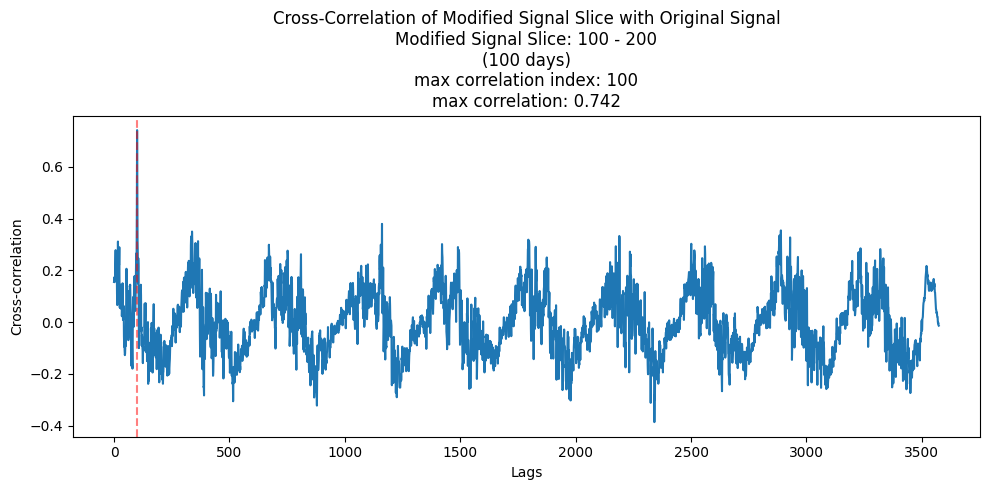

(100, 0.742280030438084)

In [99]:
def add_noise(signal_slice, noise_strength=0.1):
    noise = np.random.normal(0, noise_strength, signal_slice.shape)
    return signal_slice + noise

np.random.seed(42)
test_signal_modifications(daily_radiation, 100, 200, lambda x: add_noise(x, np.std(daily_radiation)))

Normalverteiltes Rauschen mit der gleichen Standardabweichung wie das Signal, wird noch toleriert. Die Korrelation hat aber deutlich abgenommen von 1 auf 0.74.

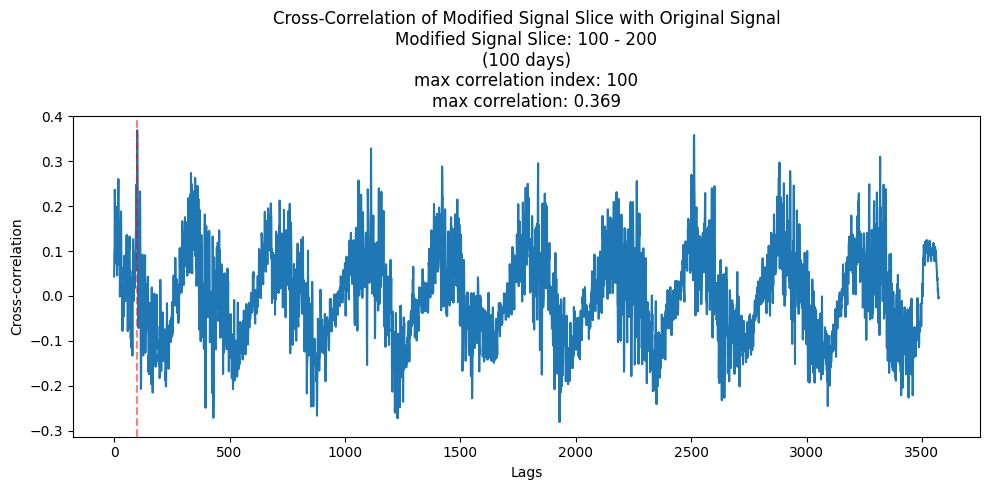

(100, 0.36936478415954904)

In [101]:
np.random.seed(41)
test_signal_modifications(daily_radiation, 100, 200, lambda x: add_noise(x, np.std(daily_radiation) * 2))

Beim Verdoppeln der Standardabweichung wird die Korrelation nochmals deutlich kleiner (0.37) und es hat diverse andere Peaks die fast gleich hoch sind. Hier ist also die Wahrscheinlichkeit gross, dass das Signal an einer anderen Stelle im Originalsignal "gefunden" wird. 

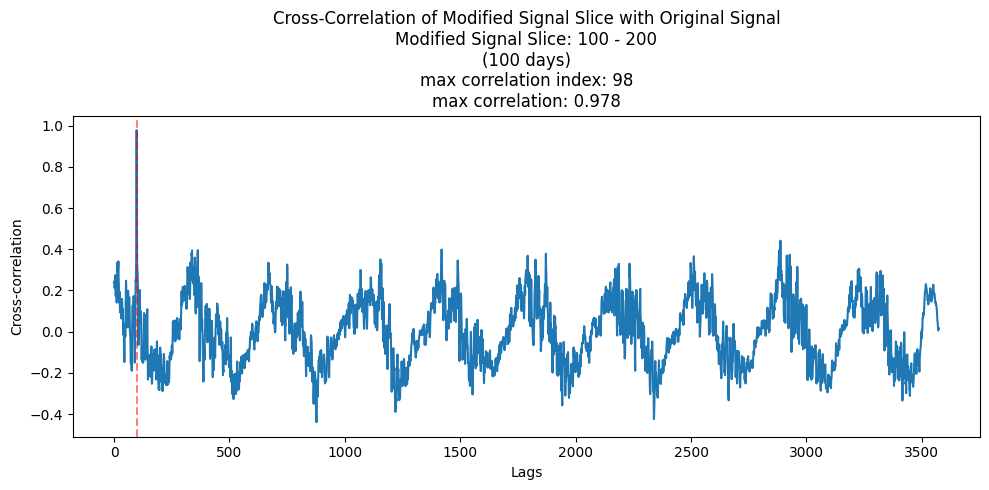

(98, 0.9781951242616403)

In [108]:
def time_shift(signal_slice, shift=10):
    return np.roll(signal_slice, shift)

test_signal_modifications(daily_radiation, 100, 200, lambda x: time_shift(x, 2))

Einen Timeshift von 2 Tagen wird nicht toleriert. Der maximale Index verschiebt sich um 2 Tage nach rechts. Die Korrelation ist ein bisschen kleiner (0.98). Das sich der Index um 2 Tage verschiebt ist logisch, da das ausgeschnittene Stück des Signals um 2 Tage verschoben wurde.

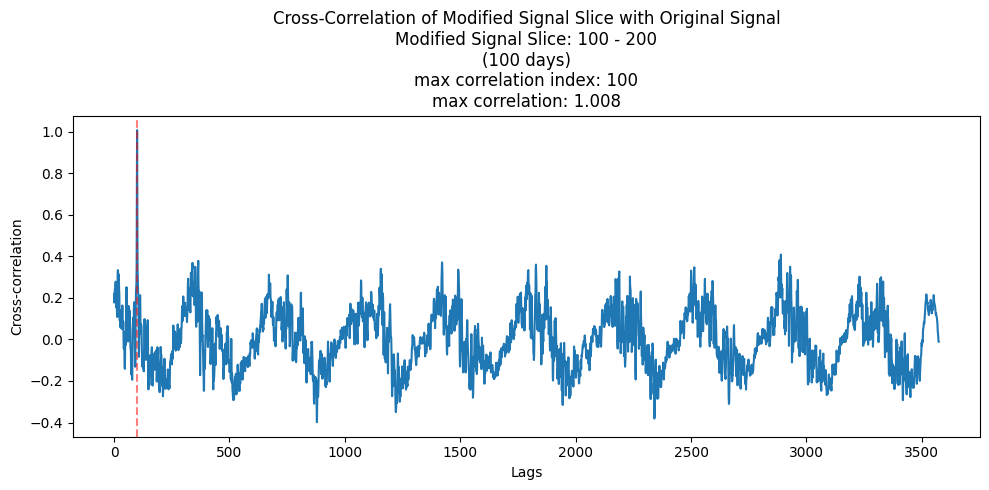

(100, 1.0076487465668131)

In [110]:
def change_amplitude(signal_slice, factor=2):
    return signal_slice * factor

test_signal_modifications(daily_radiation, 100, 200, lambda x: change_amplitude(x, 2))

Das verändern der Amplitude des Signals hat keinen Einfluss auf die Korrelation. Die Korrelation bleibt bei 1.0. Das macht Sinn, da die Amplitude des Signals keine Auswirkung auf die Korrelation hat.

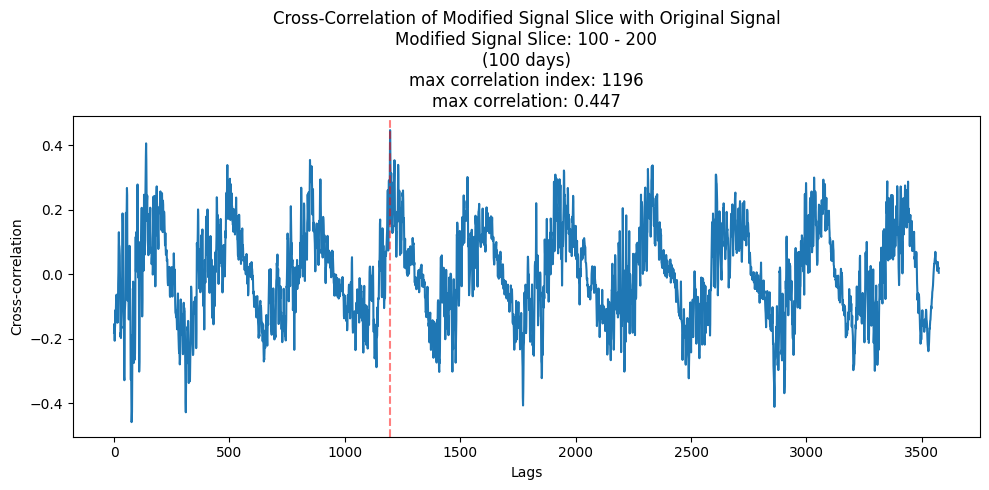

(1196, 0.44727881479552306)

In [111]:
def reverse_signal(signal_slice):
    return signal_slice[::-1]

test_signal_modifications(daily_radiation, 100, 200, lambda x: reverse_signal(x))

Das Umkehren des Signals wird überhaupt nicht toleriert. Die Korrelation ist 0.447.

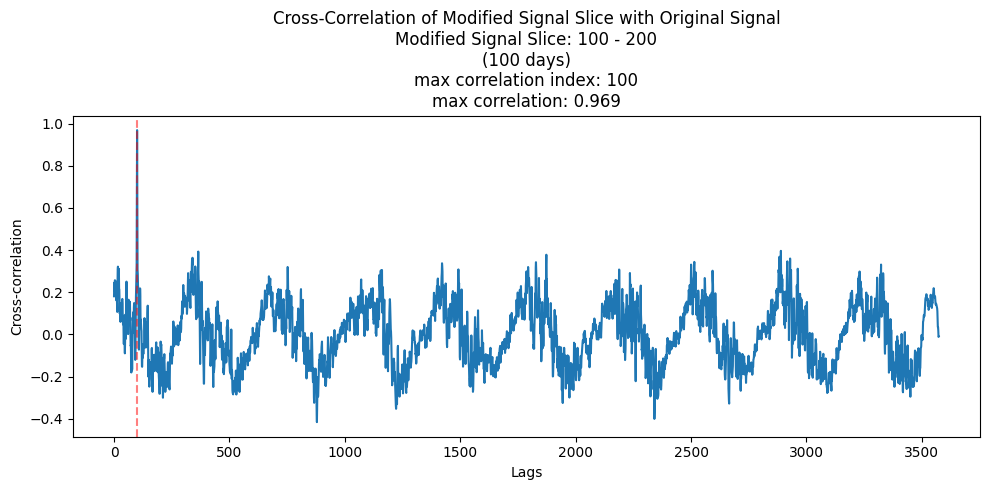

(100, 0.9686690018604783)

In [113]:
def nonlinear_transform(signal_slice, transform_type='log'):
    if transform_type == 'log':
        return np.log(signal_slice + 1)  # +1 um negative Werte zu vermeiden
    elif transform_type == 'exp':
        return np.exp(signal_slice)

test_signal_modifications(daily_radiation, 100, 200, lambda x: nonlinear_transform(x, 'log'))

Die logaritmische Transformation des Signals wird deutlich toleriert. Die Korrelation ist 0.97. Das macht Sinn, da die Korrelation nicht von der Amplitude des Signals abhängt.

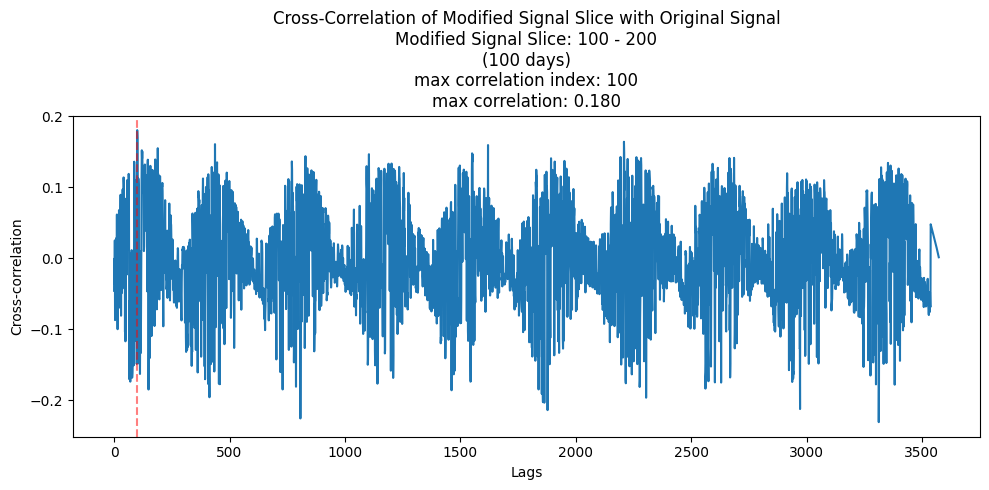

(100, 0.1804680661392141)

In [114]:
test_signal_modifications(daily_radiation, 100, 200, lambda x: nonlinear_transform(x, 'exp'))

Das Exponezieren des Signals wird nicht wirklich toleriert. Die Korrelation beträgt noch 0.18. Das Exponentieren des Signals hat einen so starken Einfluss auf die Amplitude des Signals, das sich das negativ auf die Korrelation auswirkt. Dennoch wurde der richtige Index gefunden.

Die Toleranz gegenüber Veränderungen des Signalstücks variiert mit der Art der Modifikation. Rauschen bis zur Höhe der Standardabweichung des Originalsignals wird noch toleriert, wobei die Korrelation merklich abnimmt. Eine Verstärkung des Rauschens auf das Doppelte der Standardabweichung resultiert in einer weiteren Reduktion der Korrelation und macht es schwierig, das Signal eindeutig zu identifizieren, da andere Peaks ähnlich hohe Korrelationen aufweisen können.

Zeitliche Verschiebungen werden nicht toleriert, da sie zu einer Verschiebung des Korrelationspeaks führen. Die Korrelation bleibt jedoch hoch, was darauf hindeutet, dass das Signal trotz Verschiebung noch erkennbar ist. Änderungen in der Amplitude des Signals haben keinen Einfluss auf die Korrelation, was erwartet wird, da die Kreuzkorrelation unempfindlich gegenüber Skalierungen ist.

Das Umkehren des Signals führt zu einer signifikanten Reduktion der Korrelation, was darauf hinweist, dass solche Transformationen nicht toleriert werden. Logarithmische Transformationen beeinträchtigen die Korrelation kaum, was zeigt, dass die Korrelation resistent gegenüber dieser Art von nichtlinearen Veränderungen ist. Das Exponentieren des Signals hingegen reduziert die Korrelation erheblich, was darauf hinweist, dass solche extremen Amplitudenänderungen problematisch sind.

Insgesamt zeigt sich, dass additive und multiplikative Rauschen, solange es in einem bestimmten Rahmen bleibt, sowie logarithmische Transformationen toleriert werden. Hingegen führen zeitliche Verschiebungen, Signalumkehrungen und extreme nichtlineare Transformationen wie das Exponentieren zu Problemen bei der Identifikation des Signals.


### 1.2. Segmentierung, morphologische Operationen, Objekteigenschaften in Bildern
Suche 1 Bild, welches mehrere ähnliche Objekte enthält. Diese Objekte sollen mittels geeigneter Methoden segmentiert werden. Die Resultate sollen als gelabelte Bilder (binär oder pro Klasse 1 Label) gespeichert werden. Zeige dabei, wie du die Labelmasken mittels morphologischer Operationen verbessert hast. Erkläre hier für jede angewendete Operation in 1-2 Sätzen, warum du diese Operation anwendest. Zeige auch in Einzelbildern die Zwischenresultate deiner angewendeten Operationen und dass du nur minimal die Objekte verändert hast (z.B. keine Verschiebungen, Verkleinerungen oder Vergrösserungen). Extrahiere am Ende deine einzelnen Objekte, zähle und vermesse 2-3 Eigenschaften deiner extrahierten Objekte mittels geeigneten Methoden. **Erkläre pro Eigenschaft in 1-2 Sätzen, warum du diese gewählt hast und ob die Resultate brauchbar sind.**

Erstelle dann ein möglichst minimales aber repräsentatives Skeleton eines deiner Objekte und gebe die Anzahl Pixel des Skeletons aus. 

**Diskutiere deine Erkenntnisse und Resultate in ca. 150 Wörtern.** 
  
Weiterführende Links:
- [skimage: Label image regions](https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_label.html)
- [skimage: Segment human cells (in mitosis)](https://scikit-image.org/docs/stable/auto_examples/applications/plot_human_mitosis.html#sphx-glr-auto-examples-applications-plot-human-mitosis-py)
- [skimage: Measure region properties](https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_regionprops.html)

---

## 2. Feature Deskriptoren in Bildern (LE4)
### 2.1. Keypoint Matching
Suche ein paar Bilder mit dem gleichen Sujet/Objekt aus, welche das Objekt von unterschiedlichen Blickwinkeln, aus anderer Perspektive, aus unterschiedlicher Distanz oder rotiert zeigen. Wende dann den dir zugeordneten Keypoint Deskriptor {'SIFT'} an, um mindestens zwei deiner Bilder via Keypoints zu "matchen". Wähle dafür geeignete Parameter und eine geeignete Anzahl Keypoints. Erläuere deine Entscheidungen in 1-2 Sätzen. Zeige deine Resultate visuell und stelle 2-3 Beobachtungen auf. 
Diskutiere in ca. 150 Wörtern wie robust der dir zugeordnete Algorithms {'SIFT'} ist in Bezug auf Transformationen oder unterschiedlicher Aufnahmeverhältnisse (Licht, ...) und dessen rechnerische Effizienz. Zeige mindestens eine dieser Eigenschaften anhand deiner Beispieldaten. Diskutiere die Resultate und Erkenntnisse in 2-3 Sätzen. 

Achtung: dies ist eine offene Aufgabenstellung. Setzt euch selbst einen Rahmen für die Beschränkung oder kommt in die Sprechstunde, sofern euch die Grenzen nicht klar sind. Treffende Datenwahl, auf den Punkt gebrachte Kreativität, massvolle Vielfalt und kritisches Denken sind gesucht.

---


## 3. Peer-Grading
Nach Abgabe der Mini-Challenge hast du 1 Woche Zeit drei dir zugeordnete Abgaben von anderen zu bewerten. Die Zuordnung erfolgt via FHNW Peer-Grading-Tool (siehe Link unten). Orientiere dich für die Bewertung an den vorgegebenen Bewertungskriterien (siehe Excel-Datei oder Peer-Grading-Tool). Die Note 5 bedeutet, dass alles erfüllt ist, wie du es von einem guten Data Scientist in der Praxis erwarten würdest. Du startest als Baseline mit der Note 5. Entdeckst du Fehler, geht die Note nach unten. Der Note 5.5 nähert man sich, wenn die Erwartungen übertroffen wurden. Der Note 6 nähert man sich, wenn die Leistung ausserordentlich ist und kritisches Denken, Variabilität, eigene Ideen und Kreativität beinhaltet. Siehe auch Checkliste für Bewertung. Die Benotung soll auf Zehntel gerundet sein. Wer auf Zehntel gerundet mit 0.1 Abweichung die Endnote von der Fachexpertin trifft, kriegt einen Bonus von 0.2 Noten für die eigene Abgabe. In der Sprechstunde vom 16. Januar widmen wir uns dem Peer-Grading. 

Weiterführende Links:
- [FHNW Peer-Grading-Tool](https://www.cs.technik.fhnw.ch/peergrading)
